In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [5]:
len(array_Xtest)

88632

88632

In [6]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [7]:
len(array_Ytest)

88632

88632

In [8]:
model = keras.models.load_model('modelos/modeloGeneral_v2.h5')

In [9]:
from pickle import load
scalerHours = load(open('dataset/generado/scalerHours.scaler', 'rb'))
scalerMin = load(open('dataset/generado/scalerMin.scaler', 'rb'))
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))
scalerPodId = load(open('dataset/generado/scalerPodId.scaler', 'rb'))
scalerLevelId = load(open('dataset/generado/scalerLevelId.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [10]:
len(array_Ytest)

88632

88632

2770/2770 [==============================] - 14s 5ms/step


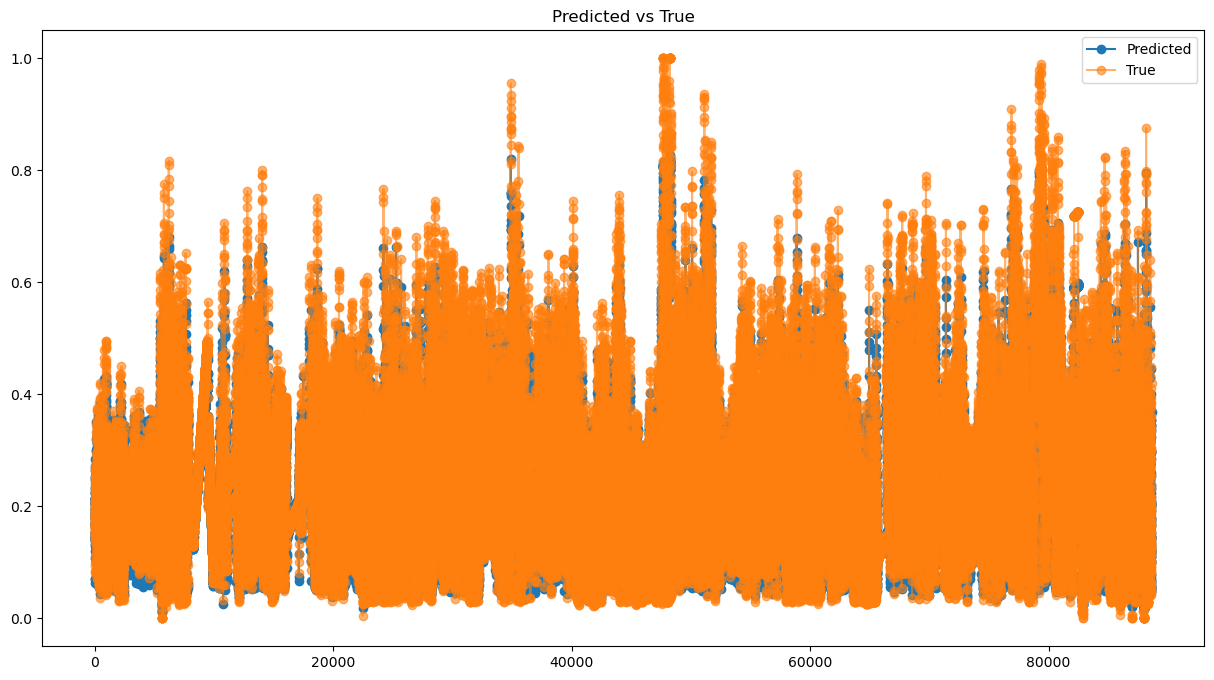

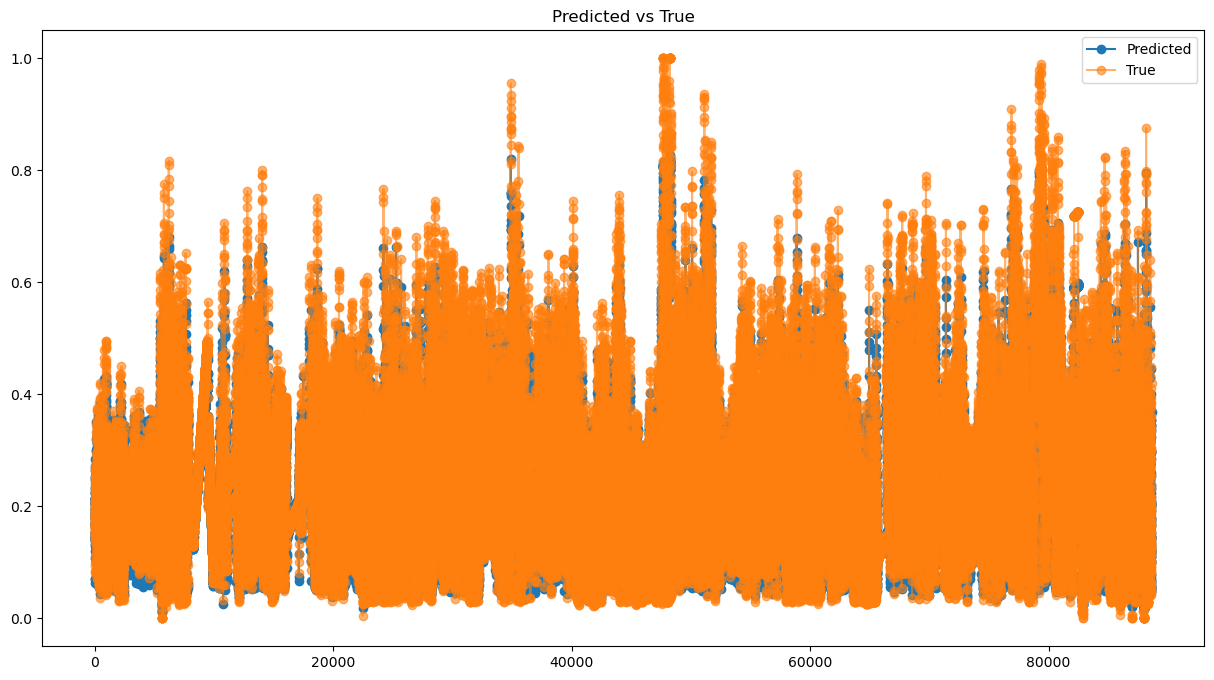

In [11]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [12]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.020981140032739216,
 'mse': 0.03378324490790044,
 'rmse': 0.001141307636507181}

{'mae': 0.020981140032739216,
 'mse': 0.03378324490790044,
 'rmse': 0.001141307636507181}

# Predicción a 30 min del conjunto de pruebas generales

In [13]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [14]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 31ms/step


,Glucose level Predict,Glucose level True
0,0.147506,0.165217
1,0.187505,0.178261


,Glucose level Predict,Glucose level True
0,0.147506,0.165217
1,0.187505,0.178261


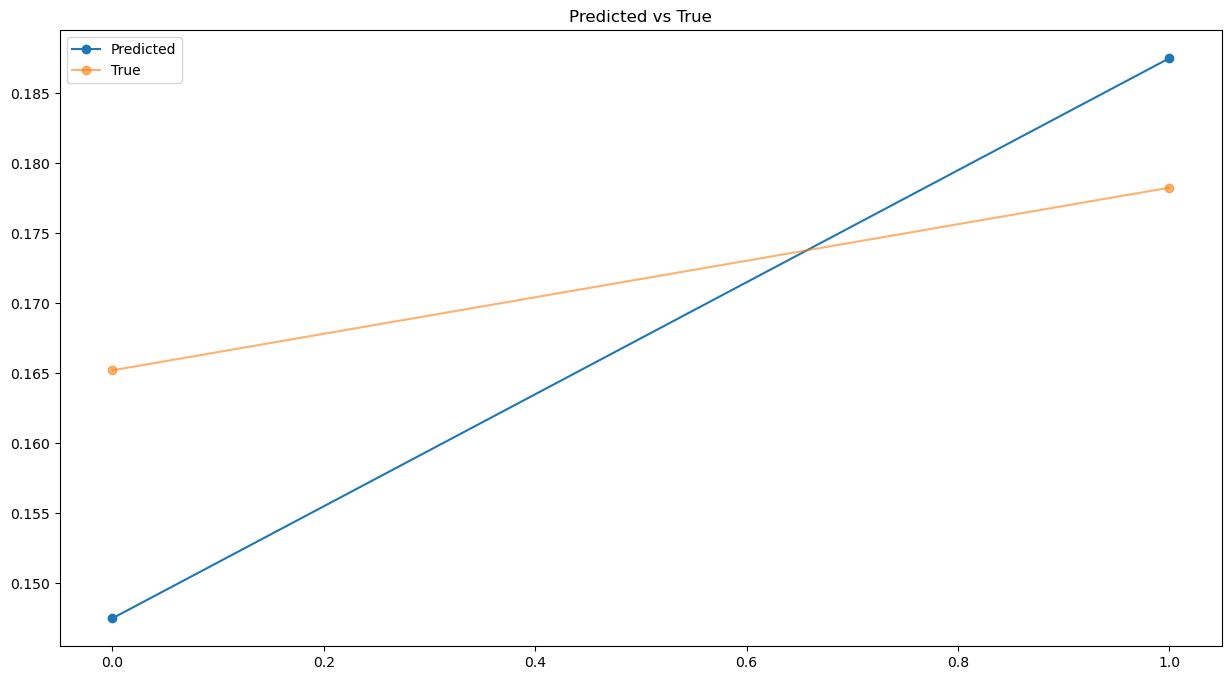

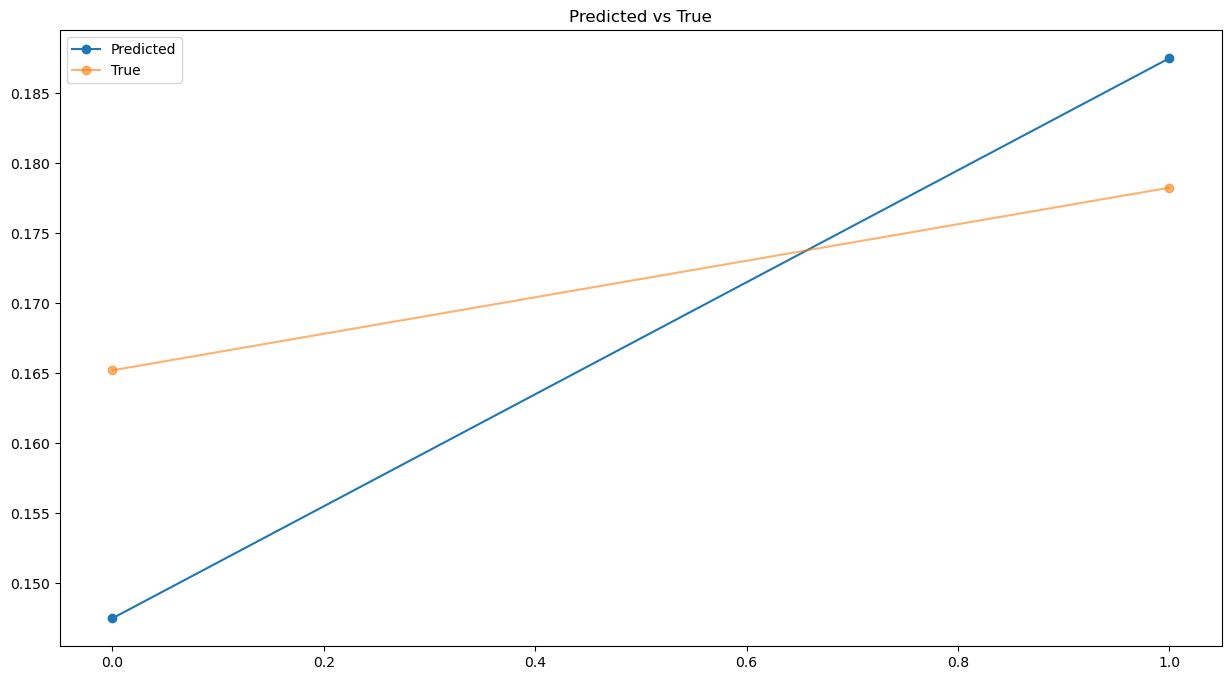

{'mae': 0.013477891618790816,
 'mse': 0.014127189448329941,
 'rmse': 0.00019957748170900481}

{'mae': 0.013477891618790816,
 'mse': 0.014127189448329941,
 'rmse': 0.00019957748170900481}

In [15]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [16]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

,Glucose level Predict,Glucose level True
0,107.852684,116.0
1,126.252350,122.0


,Glucose level Predict,Glucose level True
0,107.852684,116.0
1,126.252350,122.0


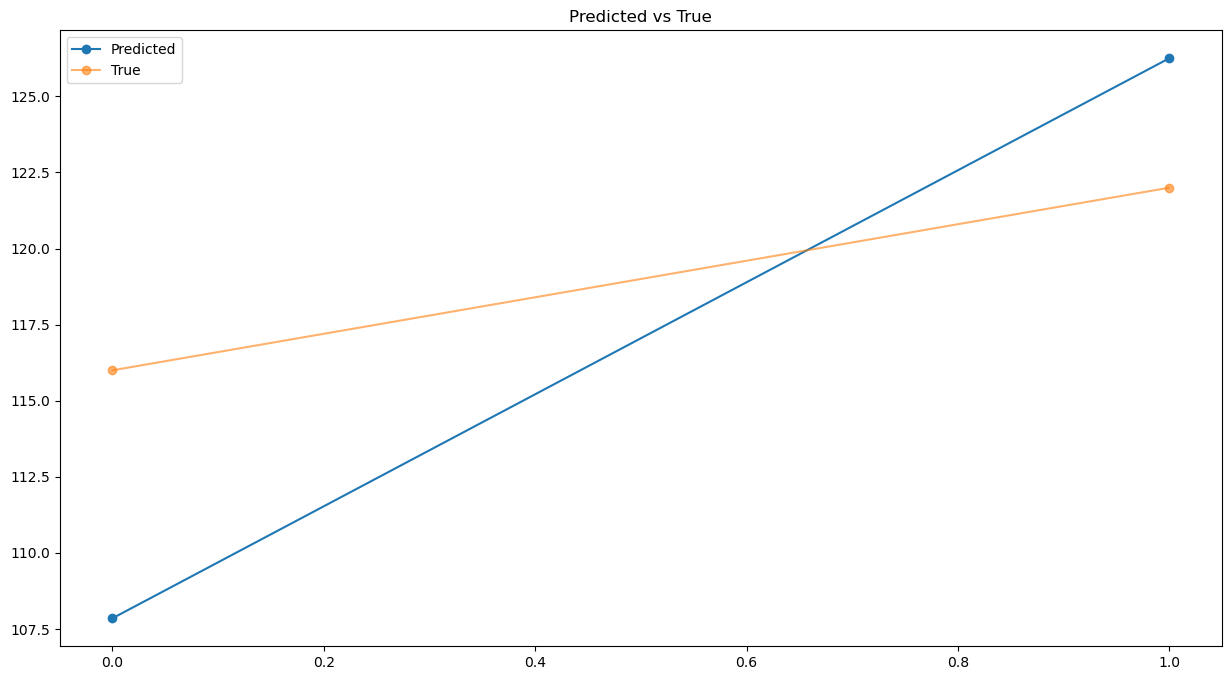

{'mae': 6.199832916259751, 'mse': 6.498508941996864, 'rmse': 42.2306184692132}

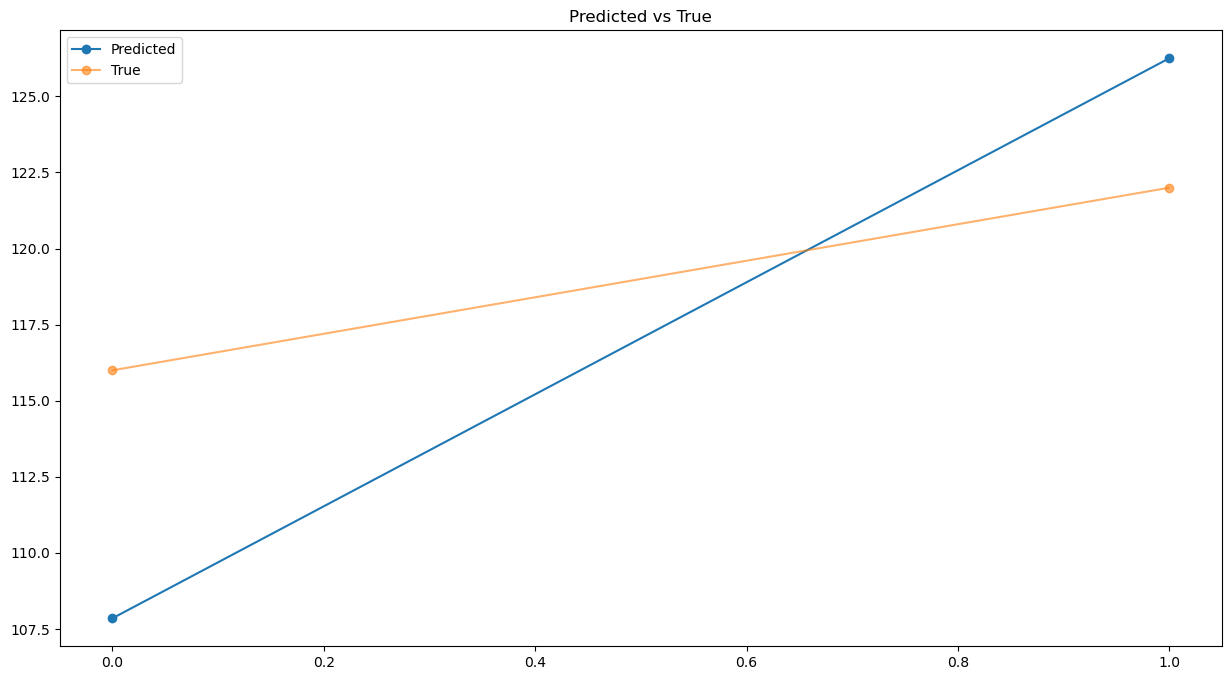

{'mae': 6.199832916259751, 'mse': 6.498508941996864, 'rmse': 42.2306184692132}

In [17]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [18]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 24ms/step


,Glucose level Predict,Glucose level True
0,0.147506,0.165217
1,0.141235,0.178261


,Glucose level Predict,Glucose level True
0,0.147506,0.165217
1,0.141235,0.178261


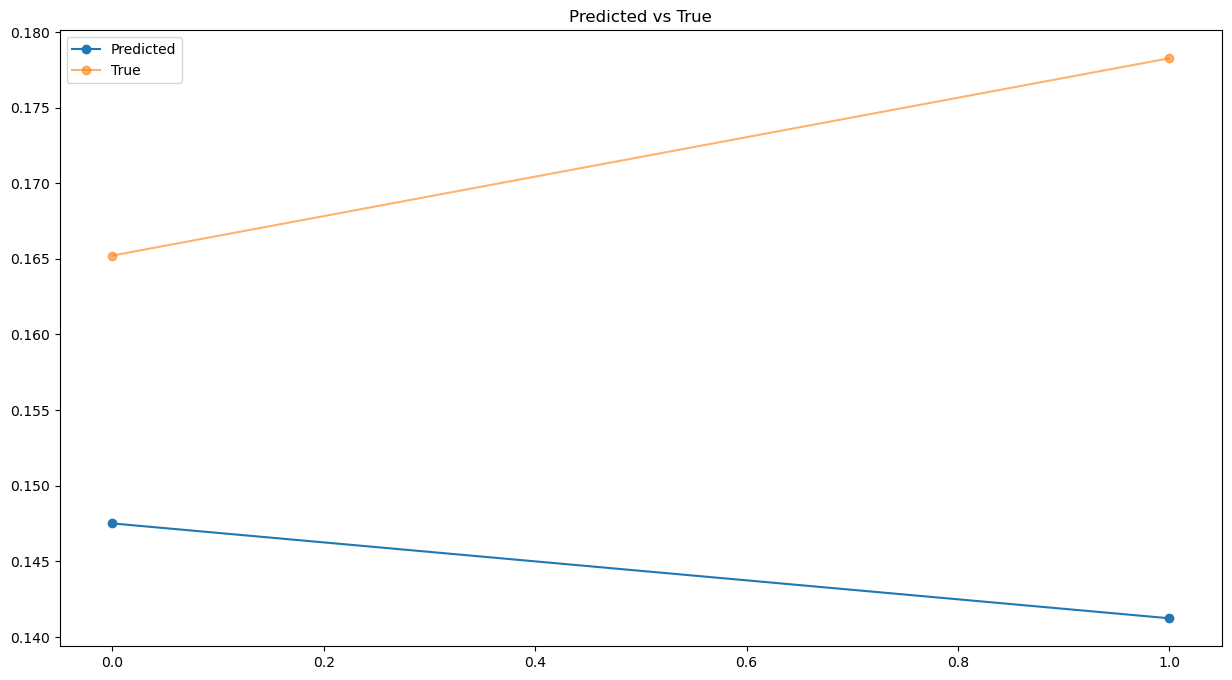

{'mae': 0.027368798074514977,
 'mse': 0.029022631393847417,
 'rmse': 0.0008423131330231377}

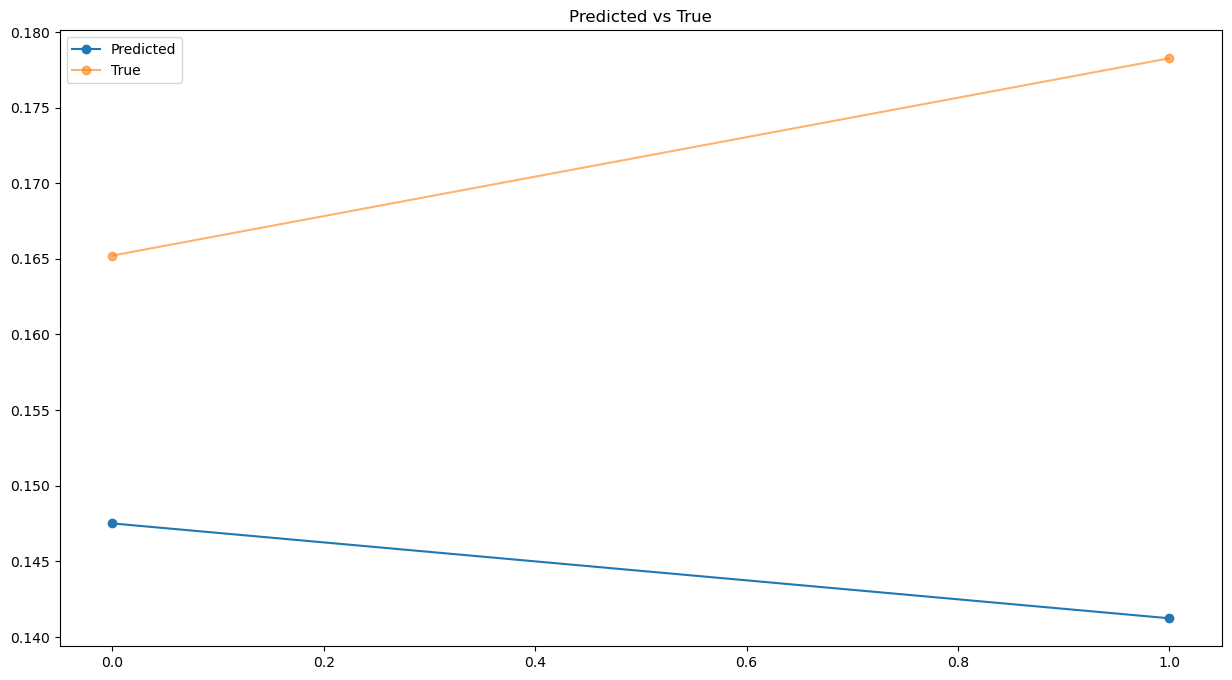

{'mae': 0.027368798074514977,
 'mse': 0.029022631393847417,
 'rmse': 0.0008423131330231377}

In [19]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [20]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

,Glucose level Predict,Glucose level True
0,107.852676,116.0
1,104.968025,122.0


,Glucose level Predict,Glucose level True
0,107.852676,116.0
1,104.968025,122.0


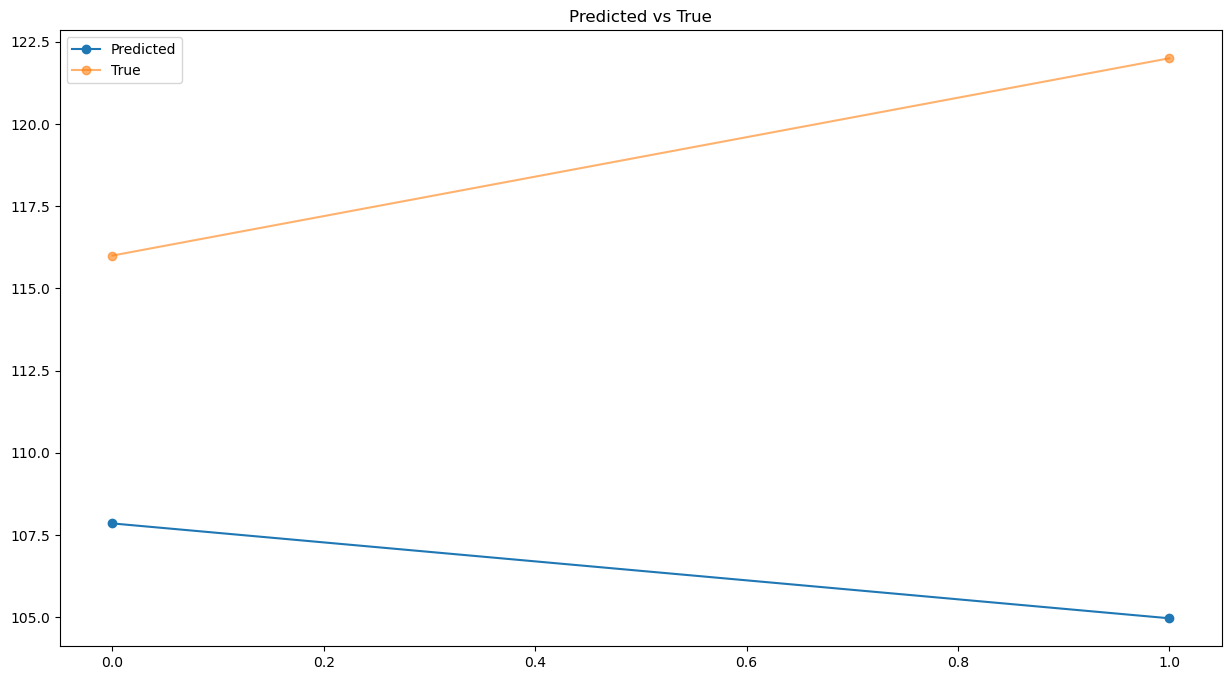

{'mae': 12.589649200439453,
 'mse': 13.350412864620647,
 'rmse': 178.23352365582846}

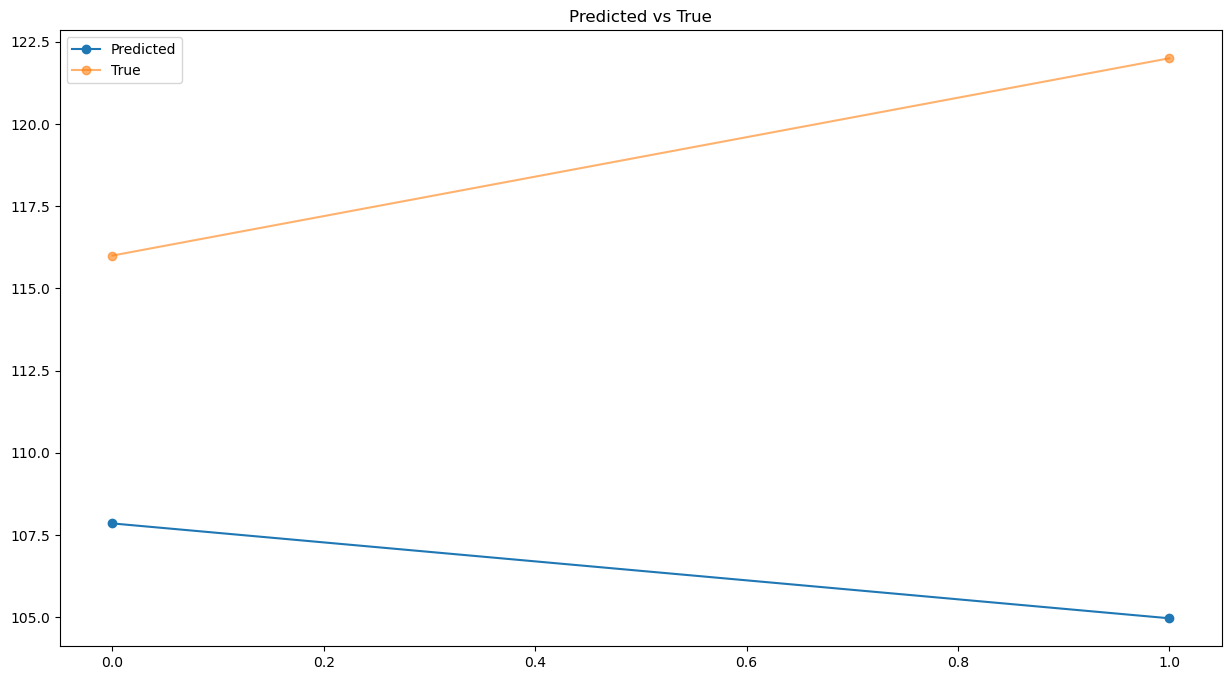

{'mae': 12.589649200439453,
 'mse': 13.350412864620647,
 'rmse': 178.23352365582846}

In [21]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto eventos del paciente 1

In [22]:
with open('dataset/generado/paciente1/eventos_X.npy', 'rb') as f:
    X = np.load(f) 

In [23]:
with open('dataset/generado/paciente1/eventos_Y.npy', 'rb') as f:
    Y = np.load(f) 

In [24]:
len(X)

25

25

In [25]:
len(Y)

25

25

In [26]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

Y_scaled=scalerGlucosa.inverse_transform(Y)
df_Y_scaled = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 

In [27]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 28ms/step


,Glucose level Predict,Glucose level True
0,0.124488,0.130435
1,0.321613,0.328261
2,0.326741,0.345652
3,0.083165,0.086957
4,0.267779,0.245652


,Glucose level Predict,Glucose level True
0,0.124488,0.130435
1,0.321613,0.328261
2,0.326741,0.345652
3,0.083165,0.086957
4,0.267779,0.245652


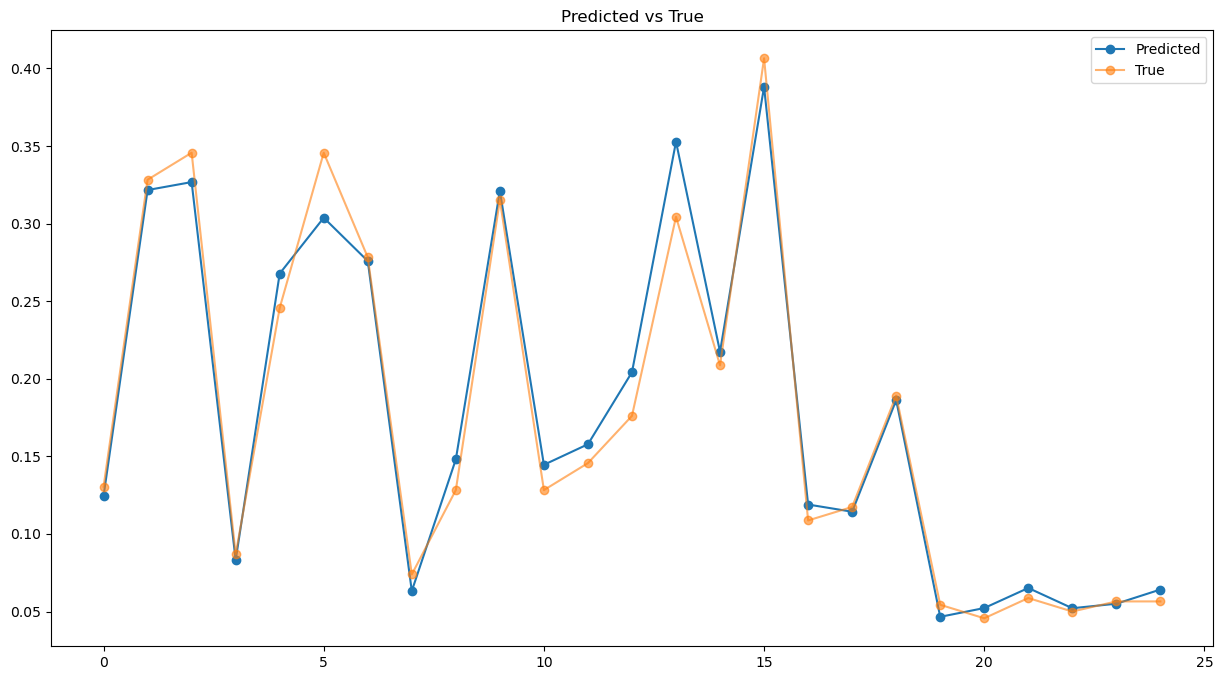

{'mae': 0.01273399678520534,
 'mse': 0.01736138620701732,
 'rmse': 0.0003014177310292112}

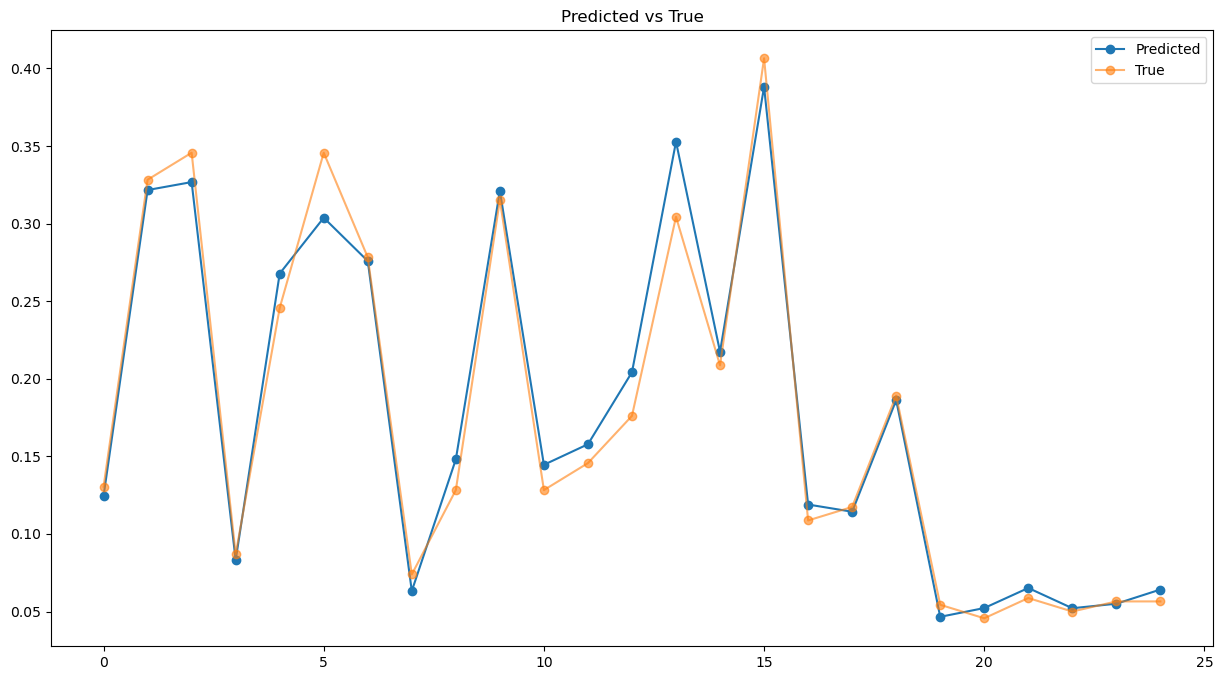

{'mae': 0.01273399678520534,
 'mse': 0.01736138620701732,
 'rmse': 0.0003014177310292112}

In [28]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

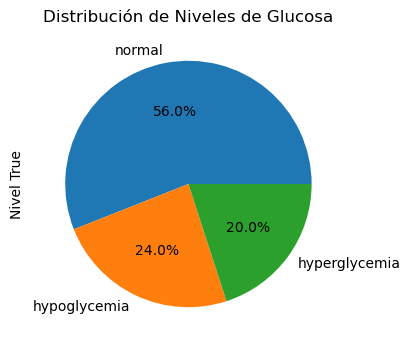

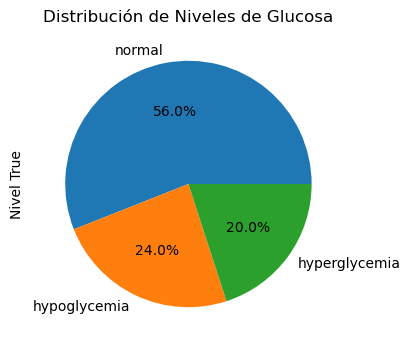

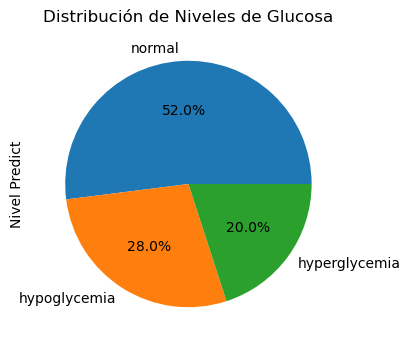

,Glucose level Predict,Nivel Predict,Glucose level True,Nivel True
0,97.264473,normal,100.0,normal
1,187.942017,hyperglycemia,191.0,hyperglycemia
2,190.300659,hyperglycemia,199.0,hyperglycemia
3,78.255859,normal,80.0,normal
4,163.178207,normal,153.0,normal


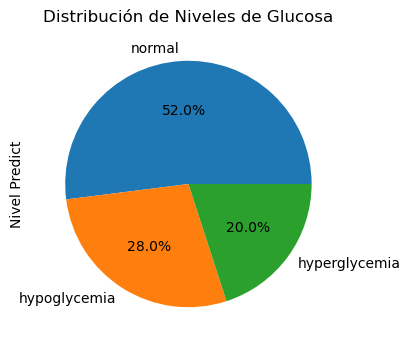

,Glucose level Predict,Nivel Predict,Glucose level True,Nivel True
0,97.264473,normal,100.0,normal
1,187.942017,hyperglycemia,191.0,hyperglycemia
2,190.300659,hyperglycemia,199.0,hyperglycemia
3,78.255859,normal,80.0,normal
4,163.178207,normal,153.0,normal


In [29]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Glucose level True']=df_Y_scaled['Glucose level True']
df_glucose['Nivel True'] = df_Y_scaled['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


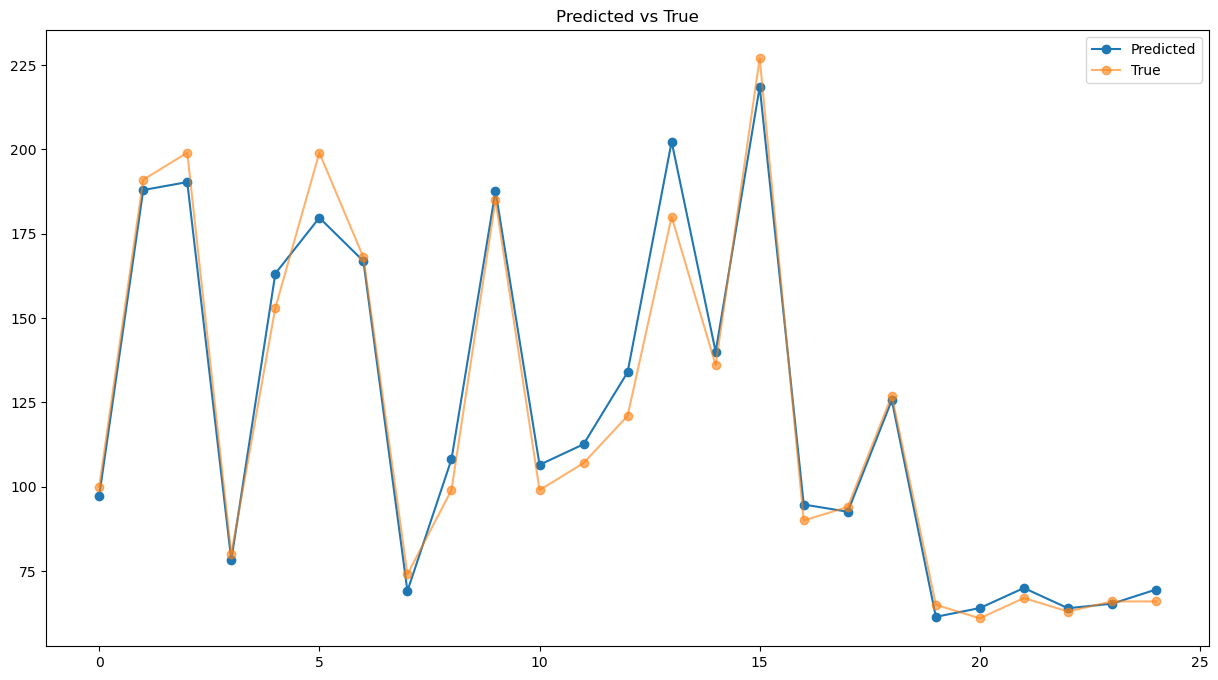

{'mae': 5.857638854980468, 'mse': 7.986238731325488, 'rmse': 63.78000907372335}

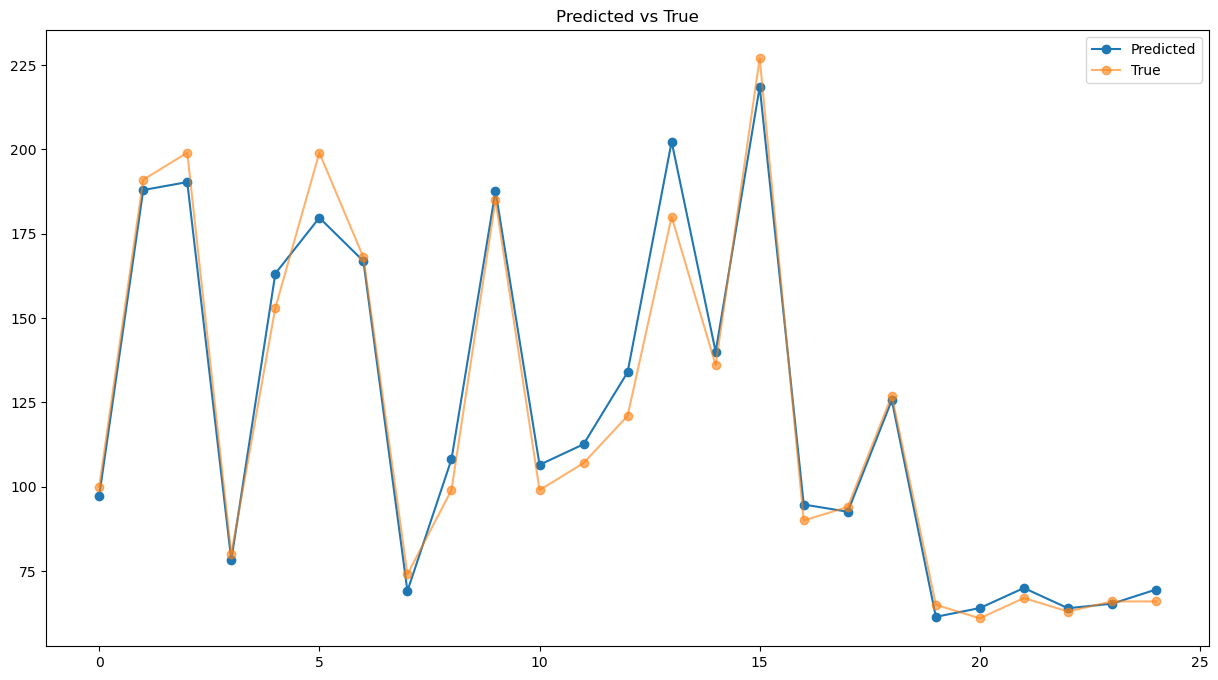

{'mae': 5.857638854980468, 'mse': 7.986238731325488, 'rmse': 63.78000907372335}

In [30]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

# Predicción del conjunto eventos del paciente 2

In [31]:
with open('dataset/generado/paciente2/eventos_X.npy', 'rb') as f:
    X = np.load(f) 

In [32]:
with open('dataset/generado/paciente2/eventos_Y.npy', 'rb') as f:
    Y = np.load(f) 

In [33]:
len(X)

25

25

In [34]:
len(Y)

25

25

In [35]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

Y_scaled=scalerGlucosa.inverse_transform(Y)
df_Y_scaled = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 

In [36]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 42ms/step


,Glucose level Predict,Glucose level True
0,0.124488,0.130435
1,0.321613,0.328261
2,0.326741,0.345652
3,0.083165,0.086957
4,0.267779,0.245652


,Glucose level Predict,Glucose level True
0,0.124488,0.130435
1,0.321613,0.328261
2,0.326741,0.345652
3,0.083165,0.086957
4,0.267779,0.245652


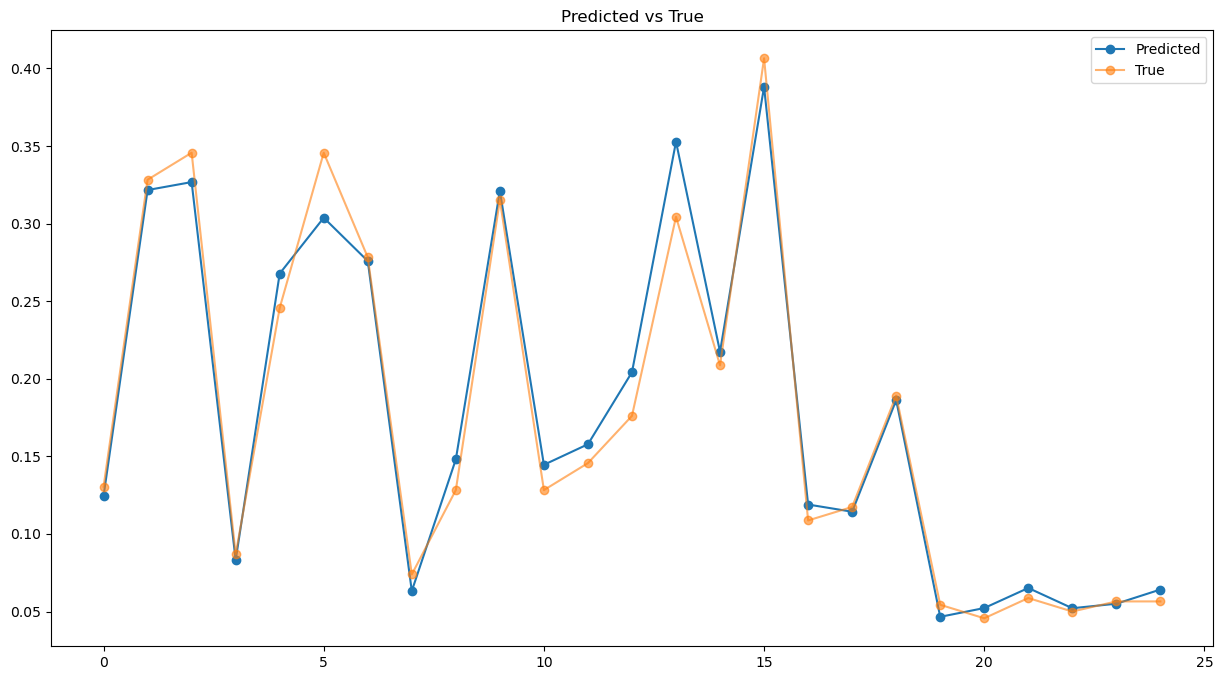

{'mae': 0.01273399678520534,
 'mse': 0.01736138620701732,
 'rmse': 0.0003014177310292112}

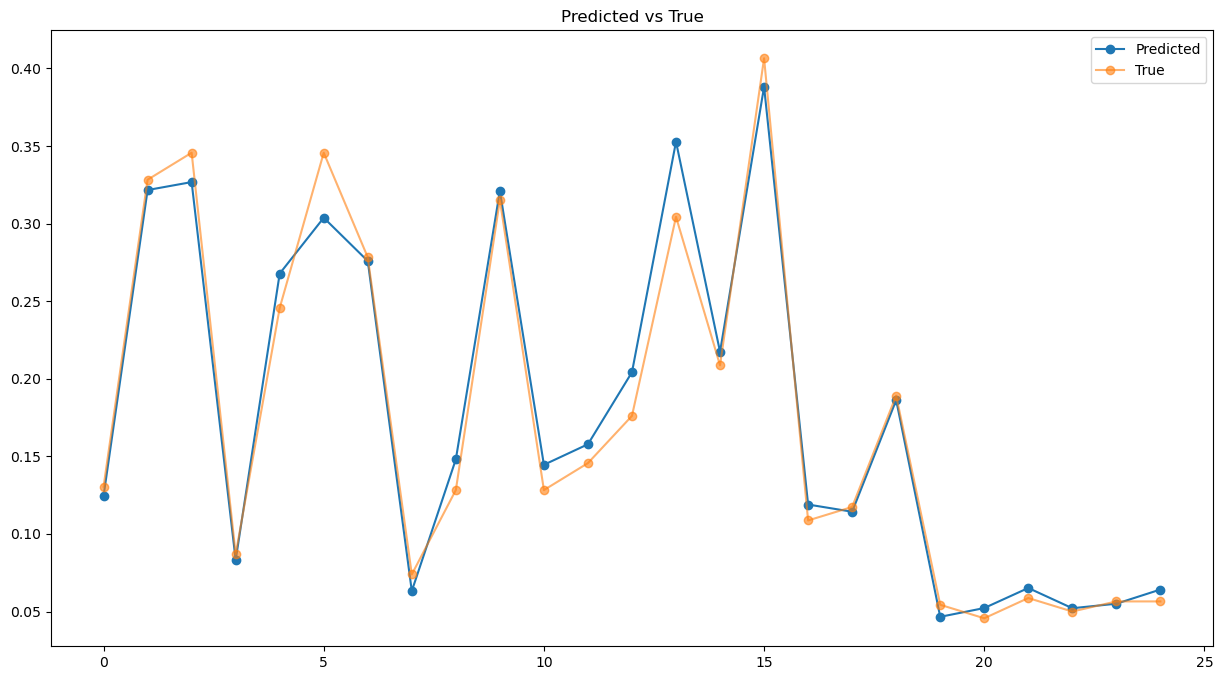

{'mae': 0.01273399678520534,
 'mse': 0.01736138620701732,
 'rmse': 0.0003014177310292112}

In [37]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

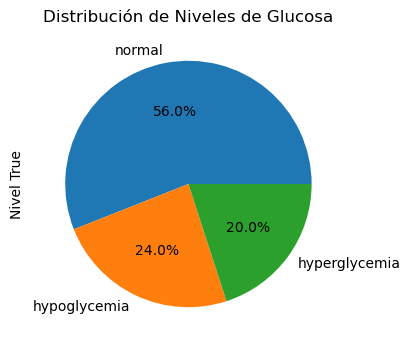

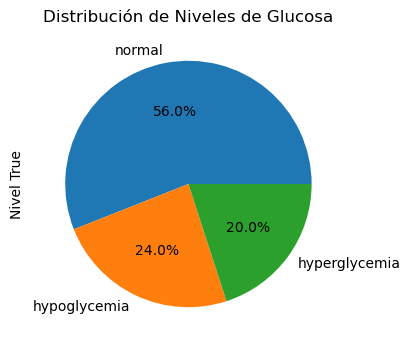

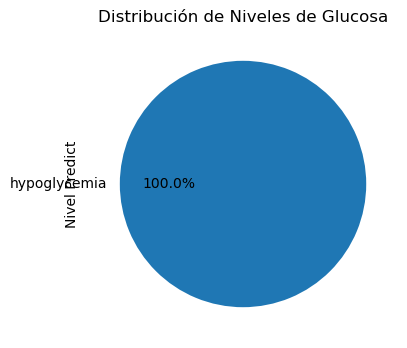

,Glucose level Predict,Glucose level True,Nivel Predict,Nivel True
0,0.124488,100.0,hypoglycemia,normal
1,0.321613,191.0,hypoglycemia,hyperglycemia
2,0.326741,199.0,hypoglycemia,hyperglycemia
3,0.083165,80.0,hypoglycemia,normal
4,0.267779,153.0,hypoglycemia,normal


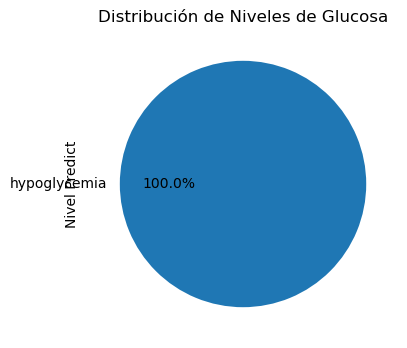

,Glucose level Predict,Glucose level True,Nivel Predict,Nivel True
0,0.124488,100.0,hypoglycemia,normal
1,0.321613,191.0,hypoglycemia,hyperglycemia
2,0.326741,199.0,hypoglycemia,hyperglycemia
3,0.083165,80.0,hypoglycemia,normal
4,0.267779,153.0,hypoglycemia,normal


In [38]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Glucose level True']=df_Y_scaled['Glucose level True']
df_glucose['Nivel True'] = df_Y_scaled['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()



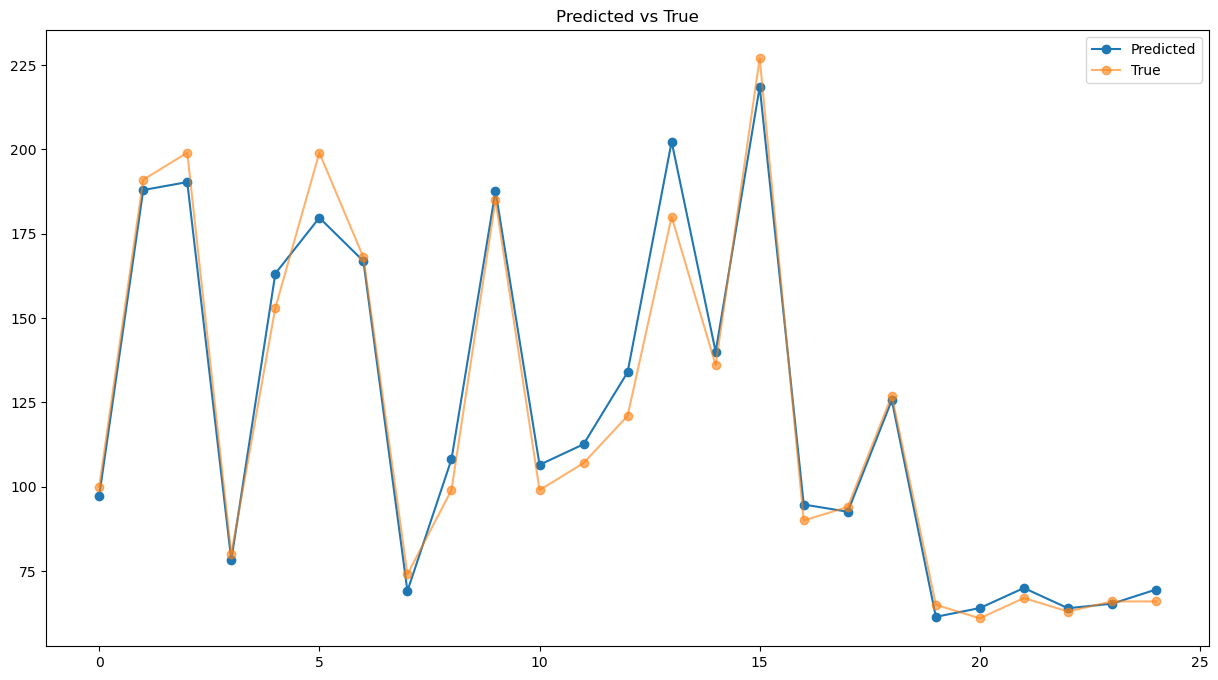

{'mae': 5.857638854980468, 'mse': 7.986238731325488, 'rmse': 63.78000907372335}

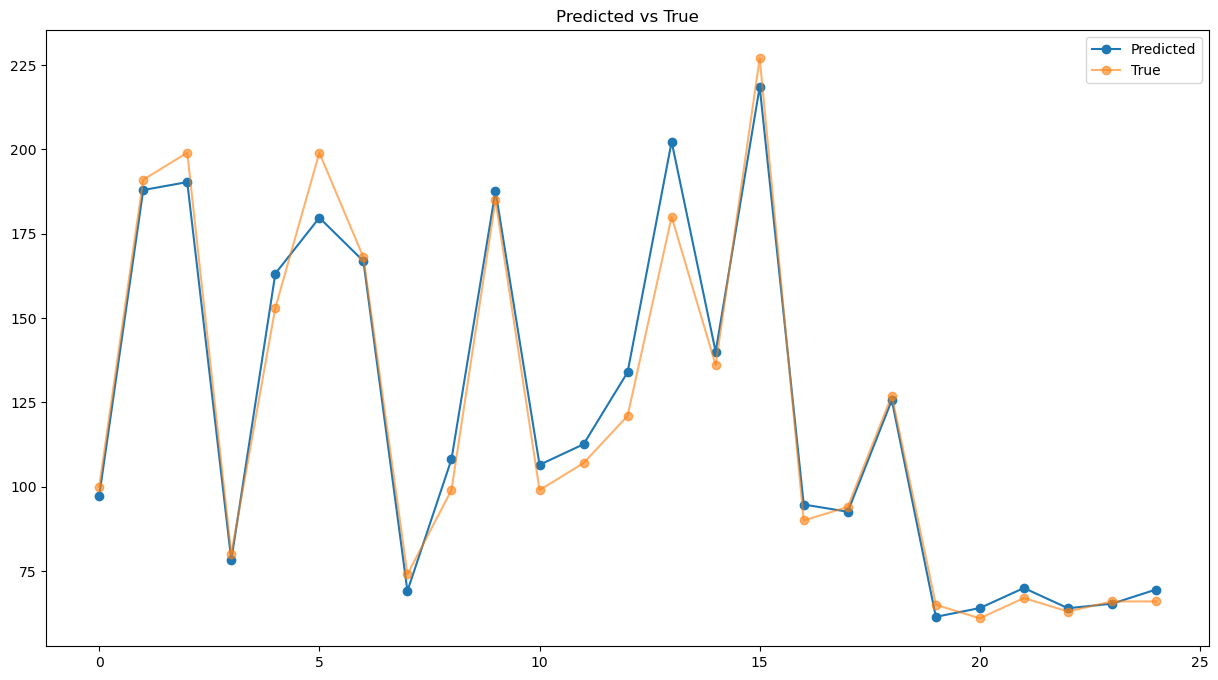

{'mae': 5.857638854980468, 'mse': 7.986238731325488, 'rmse': 63.78000907372335}

In [39]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

# Predicción del conjunto eventos del paciente 3

In [40]:
with open('dataset/generado/paciente3/eventos_X.npy', 'rb') as f:
    X = np.load(f) 

In [41]:
with open('dataset/generado/paciente3/eventos_Y.npy', 'rb') as f:
    Y = np.load(f) 

In [42]:
len(X)

24

24

In [43]:
len(Y)

24

24

In [44]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

Y_scaled=scalerGlucosa.inverse_transform(Y)
df_Y_scaled = pd.DataFrame(Y_scaled, columns=['Glucose level True'])

In [45]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 33ms/step


,Glucose level Predict,Glucose level True
0,0.040830,0.030435
1,0.175020,0.165217
2,0.206535,0.208696
3,0.040154,0.028261
4,0.227196,0.223913


,Glucose level Predict,Glucose level True
0,0.040830,0.030435
1,0.175020,0.165217
2,0.206535,0.208696
3,0.040154,0.028261
4,0.227196,0.223913


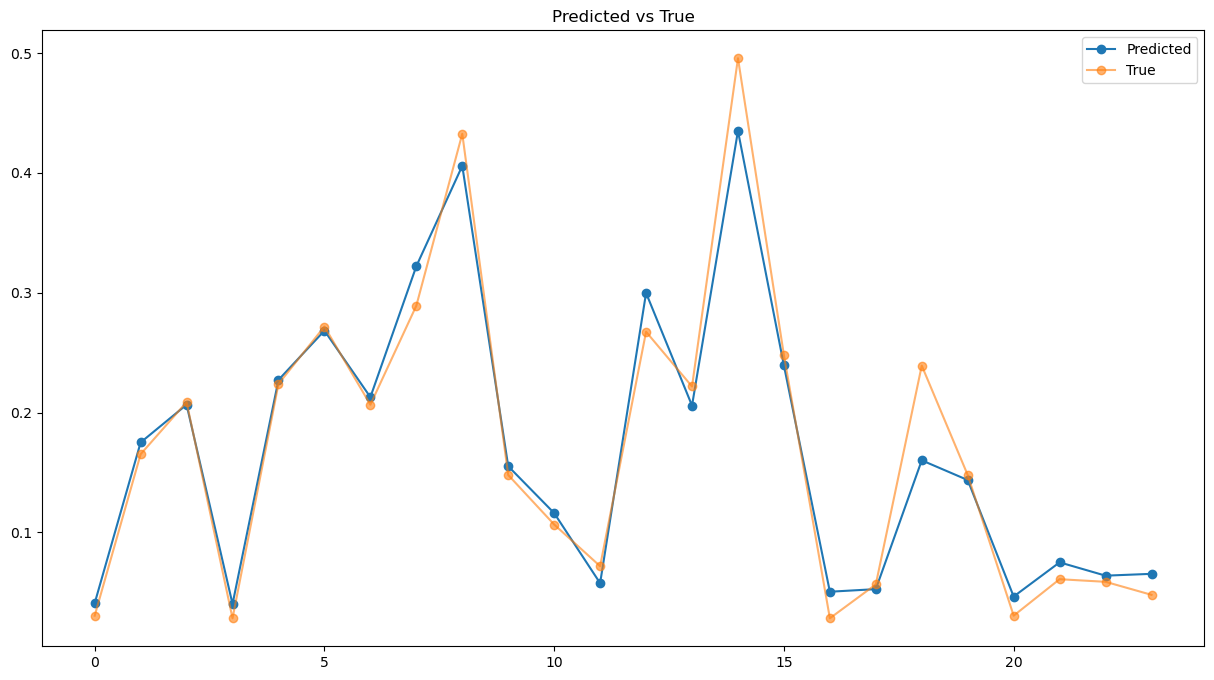

{'mae': 0.01739768971675548,
 'mse': 0.025143994554246707,
 'rmse': 0.0006322204621439881}

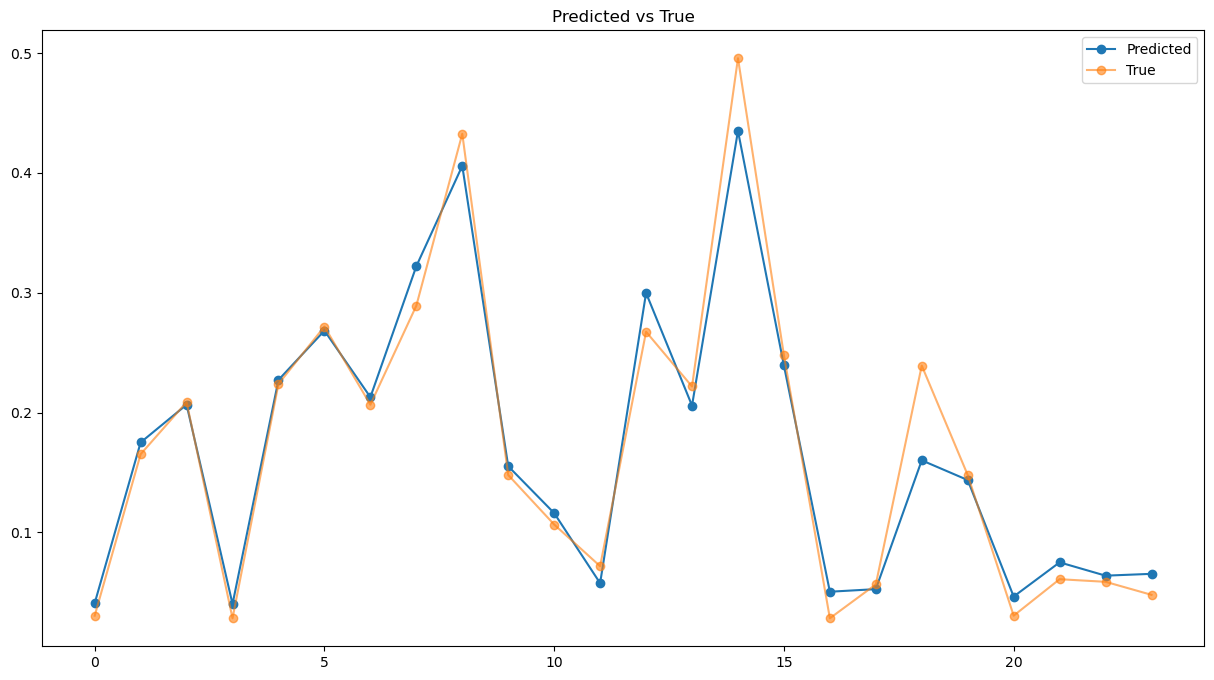

{'mae': 0.01739768971675548,
 'mse': 0.025143994554246707,
 'rmse': 0.0006322204621439881}

In [46]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

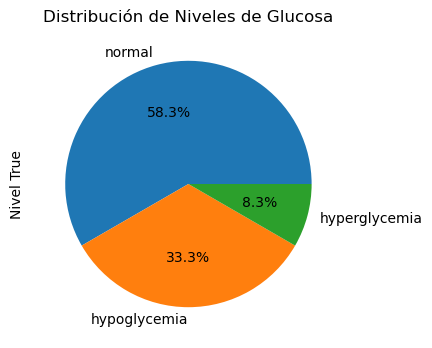

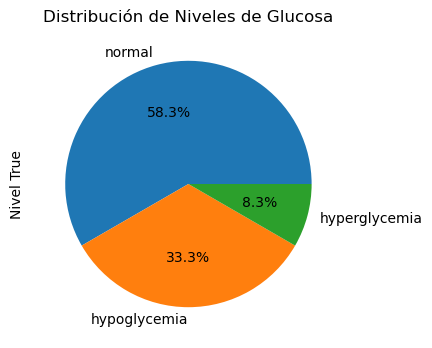

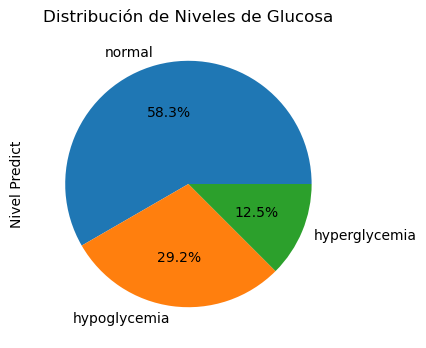

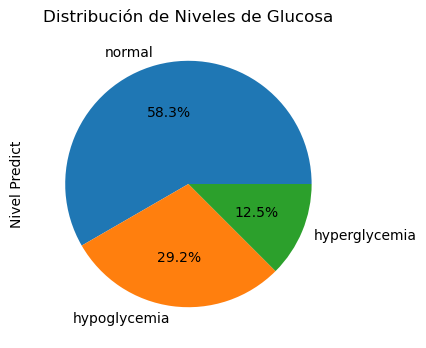

,Glucose level Predict,Nivel Predict,Glucose level True,Nivel True
0,58.781776,hypoglycemia,54.0,hypoglycemia
1,120.508972,normal,116.0,normal
2,135.006317,normal,136.0,normal
3,58.470734,hypoglycemia,53.0,hypoglycemia
4,144.510376,normal,143.0,normal


,Glucose level Predict,Nivel Predict,Glucose level True,Nivel True
0,58.781776,hypoglycemia,54.0,hypoglycemia
1,120.508972,normal,116.0,normal
2,135.006317,normal,136.0,normal
3,58.470734,hypoglycemia,53.0,hypoglycemia
4,144.510376,normal,143.0,normal


In [47]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Glucose level True']=df_Y_scaled['Glucose level True']
df_glucose['Nivel True'] = df_Y_scaled['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()



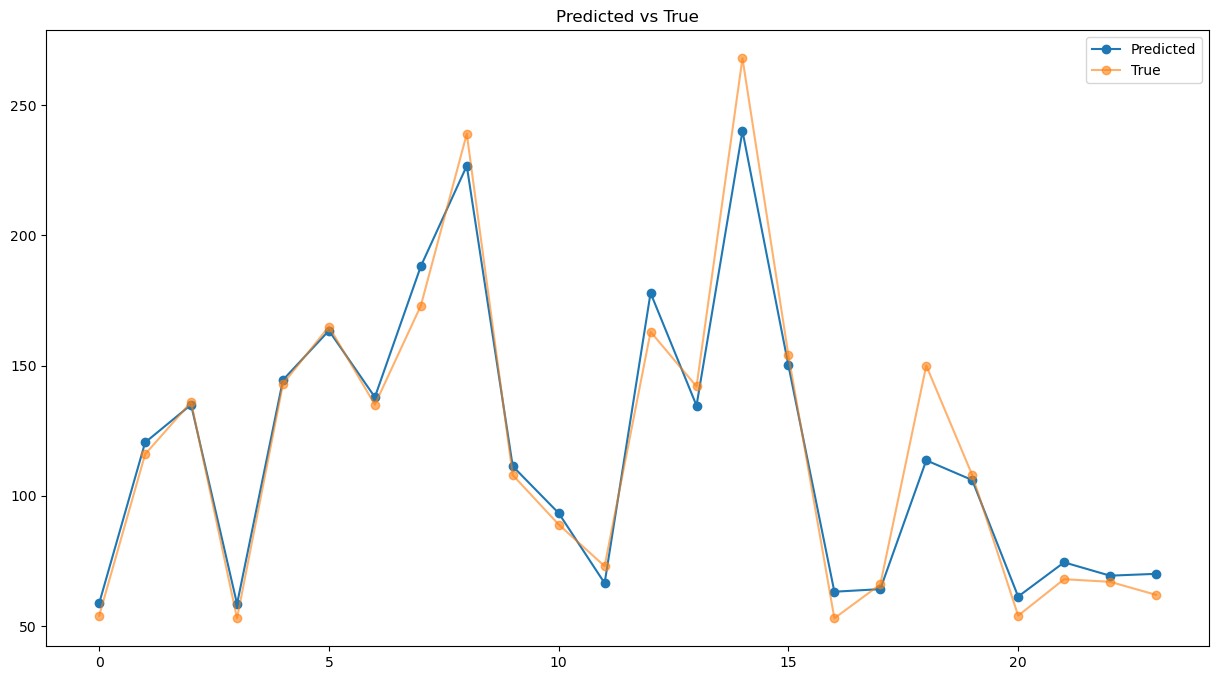

{'mae': 8.002938270568848,
 'mse': 11.566239508190066,
 'rmse': 133.77789636081675}

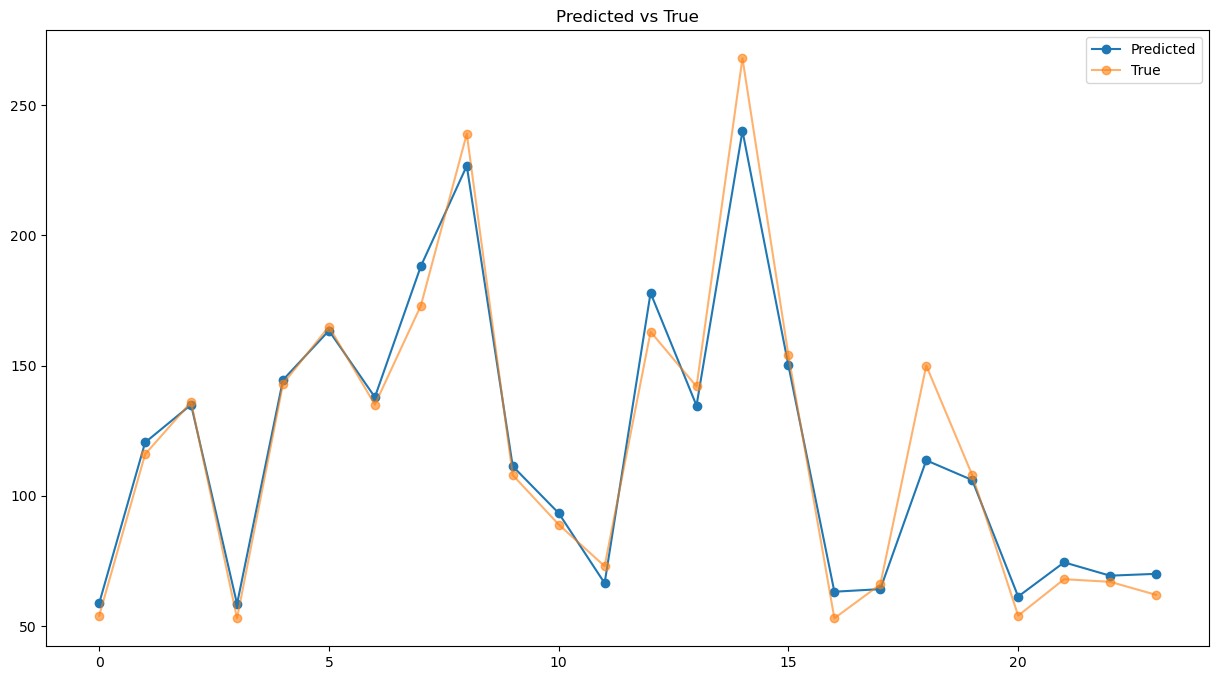

{'mae': 8.002938270568848,
 'mse': 11.566239508190066,
 'rmse': 133.77789636081675}

In [48]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)